# Titanic - Machine Learning from Disaster

Name: Noa Hemo

Kaggle account : https://www.kaggle.com/noanoanoanoanoa
---



##About the project

For our project, we will perform a classification task to predict whether an individual survived or not. Using the provided dataset, we will analyze and preprocess the features, potentially removing irrelevant ones and creating new features to improve the model's accuracy. The goal is to build a robust classification model that accurately distinguishes between the two labels: survived and not survived.

# Imports and Definitions

In [277]:
# @title
# import numpy, matplotlib, etc.

# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20


In [278]:
# load dataset
titanic_test = pd.read_csv("/test.csv")
titanic_test.reset_index(drop=True, inplace=True)
display(titanic_test)

titanic_train = pd.read_csv("/train.csv")
titanic_train.reset_index(drop=True, inplace=True)
display(titanic_train)

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# Data Investigation and Preprocessing

**Here we count empty values in each column**

In [279]:
# count empty values in each column
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')

  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

**Here we check is there is an empty values**

In [280]:
# check if there is missing data in train data
count_empty_values_in_each_column(titanic_train)

# check if there is missing data in test data
count_empty_values_in_each_column(titanic_test)

empty values
------------

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2
empty values
------------

PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


**Here we fill all the empty values in the dataframe**

In [281]:
# fill empty values in the dataframe by the median of the column
def fill_na_median(df, column_name):
  df_not_null = df[~df[column_name].isnull()]
  df[column_name].fillna(df_not_null[column_name].median(), inplace=True)

# fill empty values in the dataframe by random value from the column
def fill_na_random_pick_column_distribution(df, column_name):
  df_not_null = df[~df[column_name].isnull()]
  df_null = df[df[column_name].isnull()]
  options = np.random.choice(df_not_null[column_name])
  df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

In [282]:
# completion of missing values in train
fill_na_median(titanic_train, 'Age');
fill_na_random_pick_column_distribution(titanic_train, 'Embarked')
fill_na_median(titanic_train, 'Fare');


# completion of missing values in test
fill_na_median(titanic_test, 'Age');
fill_na_random_pick_column_distribution(titanic_test, 'Embarked')
fill_na_median(titanic_test, 'Fare');


In [283]:
print(titanic_train.columns)
print(titanic_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Preprocessing on train data and test data**

In [284]:
# clean unnecessary column such as Name and Ticket from train
titanic_train = titanic_train.drop(['Name', 'Ticket','Cabin'], axis=1)


# clean unnecessary column such as Name and Ticket from test
titanic_test = titanic_test.drop(['Name', 'Ticket','Cabin'], axis=1)


In [285]:
# check if there is missing data in train data
count_empty_values_in_each_column(titanic_train)

# check if there is missing data in test data
count_empty_values_in_each_column(titanic_test)

empty values
------------

PassengerId: 0
Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0
empty values
------------

PassengerId: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0


In [286]:
# dummy encode the categorical variables in the df with get_dummies in train
titanic_train = pd.get_dummies(titanic_train, columns=['Sex'], prefix=["Sex_type_is"], drop_first=True)
titanic_train = titanic_train.astype({col: int for col in titanic_train.select_dtypes(include='bool').columns})
titanic_train

# dummy encode the categorical variables in the df with get_dummies in test
titanic_test = pd.get_dummies(titanic_test, columns=['Sex'], prefix=["Sex_type_is"], drop_first=True)
titanic_test = titanic_test.astype({col: int for col in titanic_test.select_dtypes(include='bool').columns})


In [287]:
# using LabelEncoder from sklearn to change Embarked to numbers depanding their lables in train
lb = sklearn.preprocessing.LabelEncoder()
titanic_train['Embarked'] = lb.fit_transform(titanic_train['Embarked'])

# using LabelEncoder from sklearn to change Embarked to numbers depanding their lables in test
titanic_test['Embarked'] = lb.fit_transform(titanic_test['Embarked'])


<Figure size 1000x1000 with 0 Axes>

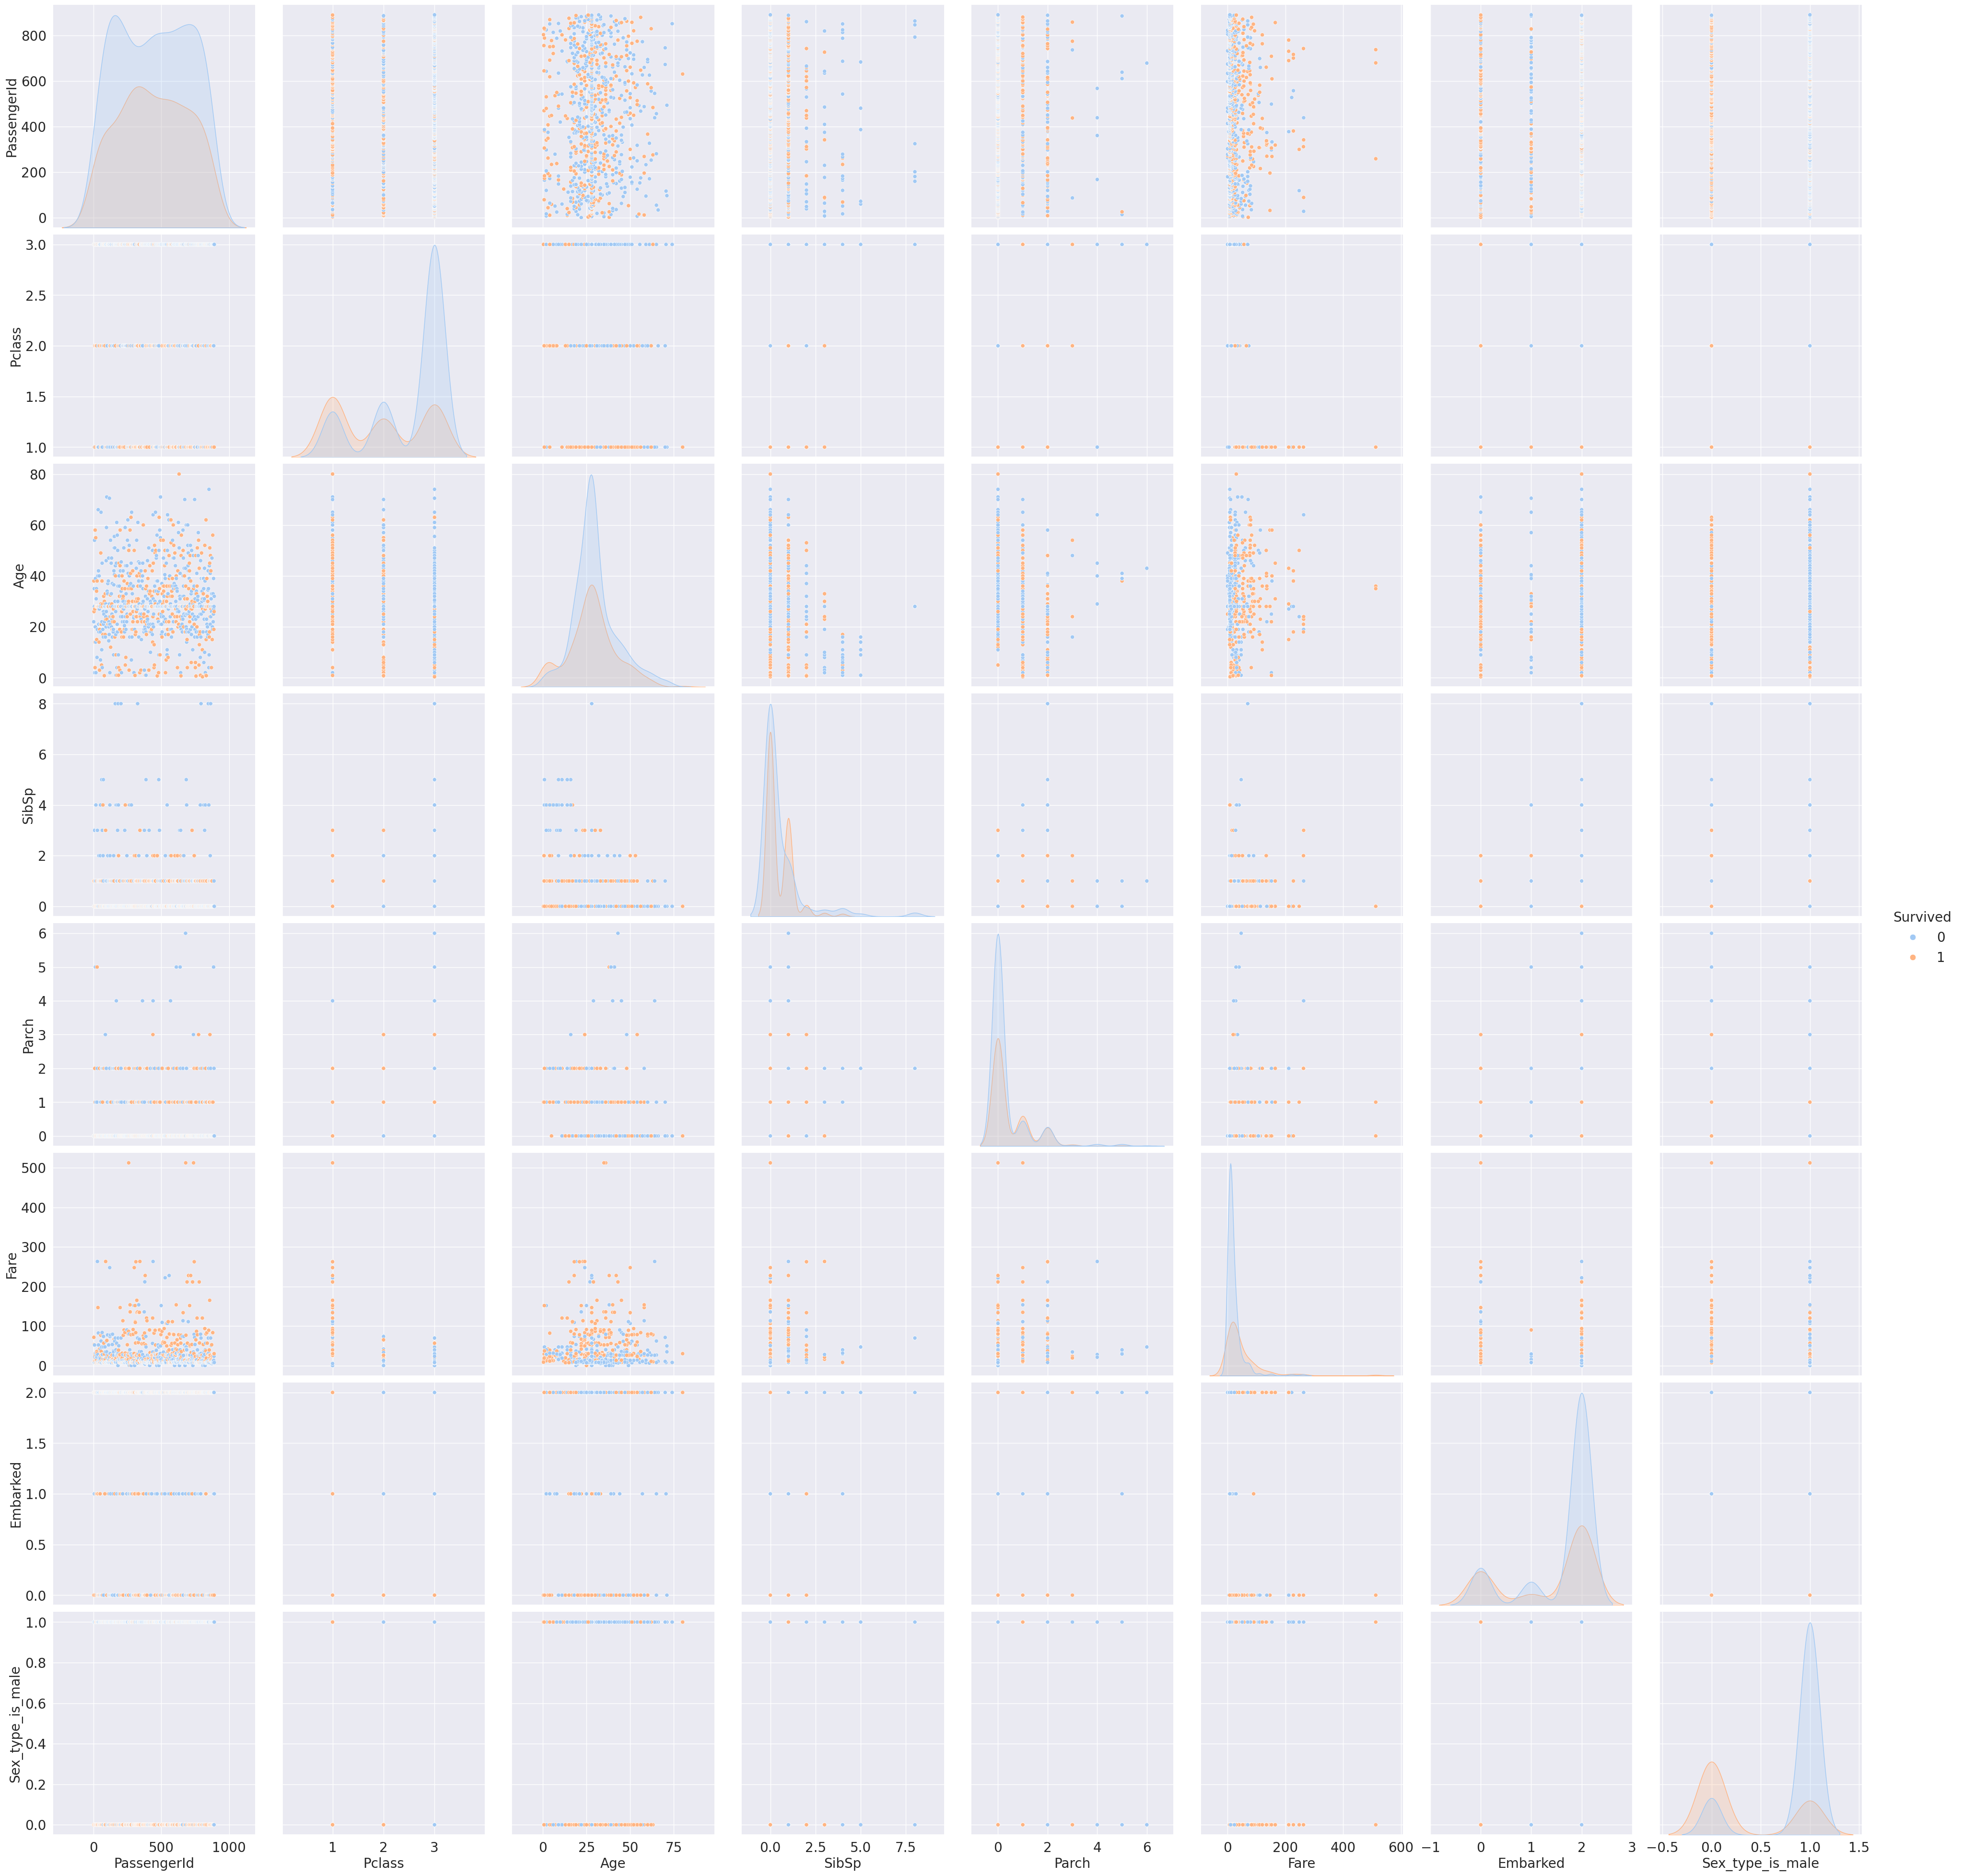

In [288]:
# show pairplot of the features
plt.figure(figsize=(10,10))
sns.pairplot(data=titanic_train, hue="Survived", palette='pastel', height=5)

**Here we can see all the information after all the changes we have made.**

In [289]:
titanic_train

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Embarked  \
0              1         0       3  22.0      1      0   7.2500         2   
1              2         1       1  38.0      1      0  71.2833         0   
2              3         1       3  26.0      0      0   7.9250         2   
3              4         1       1  35.0      1      0  53.1000         2   
4              5         0       3  35.0      0      0   8.0500         2   
..           ...       ...     ...   ...    ...    ...      ...       ...   
886          887         0       2  27.0      0      0  13.0000         2   
887          888         1       1  19.0      0      0  30.0000         2   
888          889         0       3  28.0      1      2  23.4500         2   
889          890         1       1  26.0      0      0  30.0000         0   
890          891         0       3  32.0      0      0   7.7500         1   

     Sex_type_is_male  
0                   1  
1                   0  
2                   0  
3                   0  
4                   1  
..                ...  
886                 1  
887                 0  
888                 0  
889                 1  
890                 1  

[891 rows x 9 columns]

# Features Engineering

In [290]:
# show absolute correlation between features in a heatmap
def show_heatmap(data):
  plt.figure(figsize=(18,10))
  cor = np.abs(data.corr())
  sns.heatmap(cor, annot=True, cmap="Reds", vmin=-1, vmax=1)
  plt.show()

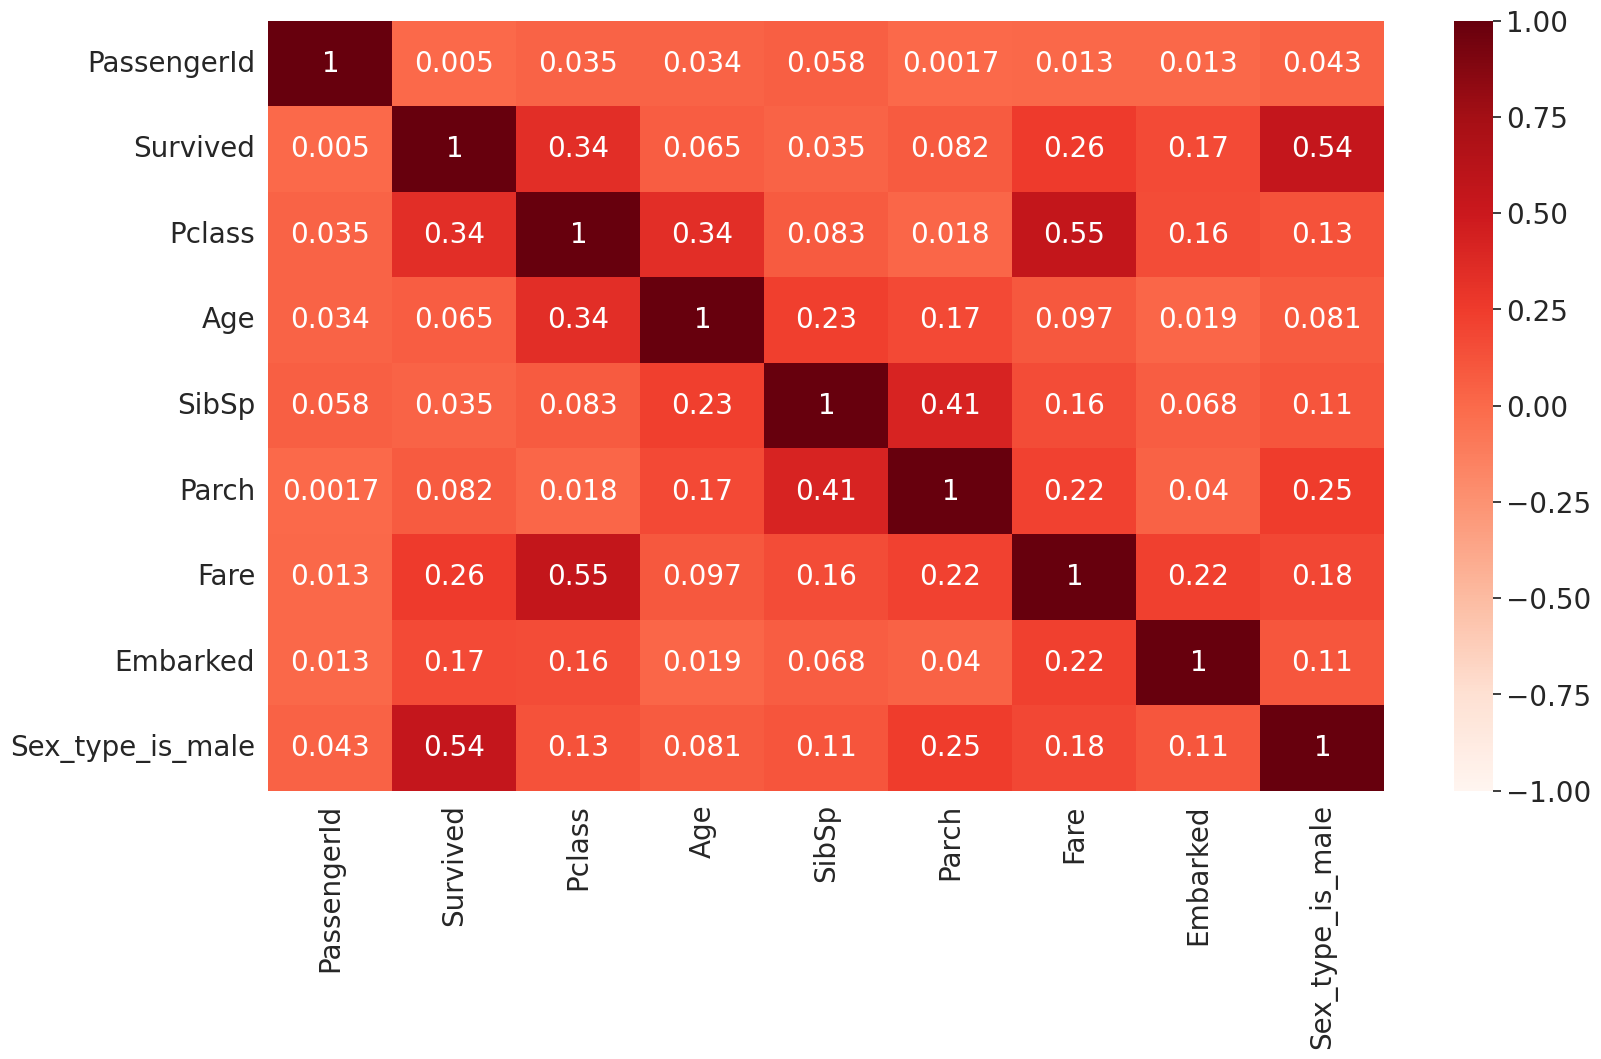

In [291]:
# showing heatmap of the train data
show_heatmap(titanic_train)

In this heatmap, we observe correlations among various features and their relationship with the target variable "survived". The feature showing the highest correlation with survival is the sex of the passengers, followed by the passenger class, which also exhibits a strong correlation with survival.

In [292]:
# import go and make_subplots and create pie charts subplots of the categorical features
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

def create_pie_chart_subplot_of_count(df, columns_names):
    # set rows , cols
    rows = int(np.ceil(np.sqrt(len(columns_names))))
    cols = int(np.ceil(len(columns_names)/rows))
    # define grid
    fig = make_subplots(rows=rows, cols=cols, specs=[[{"type": "domain"} for i in range(cols)] for j in range(rows)])
    # draw each plot in seperate grid pos
    for i, column_name in enumerate(columns_names):
        df_not_null = df[~df[column_name].isnull()]
        fig.add_trace(go.Pie(
                              labels=df_not_null.groupby([column_name]).size().reset_index(name='count')[column_name],
                              values=df_not_null.groupby([column_name]).size().reset_index(name='count')['count'],
                              name=column_name # mouse-over label
                             ),
                      (i)//cols+1, (i)%cols+1 # pos in grid
                      )
    fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
    fig.show()

# create sunburst charts of the features
titanic_train_cp = titanic_train.copy()
# add additional column used to sum
#insurance_df_cp2.insert(len(insurance_df_cp2.columns), "my_counter", 1, True)
display(titanic_train_cp)

survived_mapping = {1: 'Survived', 0: 'Not Survived'}
sex_mapping = {1: 'Male', 0: 'Female'}

titanic_train_cp['Survived'] = titanic_train_cp['Survived'].map(survived_mapping)
titanic_train_cp['Sex_type_is_male'] = titanic_train_cp['Sex_type_is_male'].map(sex_mapping)

fig = px.sunburst(titanic_train_cp , path=['Survived', 'Sex_type_is_male', 'Pclass'])
fig.update_traces(textinfo="label+percent root")
fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
fig.show()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Embarked  \
0              1         0       3  22.0      1      0   7.2500         2   
1              2         1       1  38.0      1      0  71.2833         0   
2              3         1       3  26.0      0      0   7.9250         2   
3              4         1       1  35.0      1      0  53.1000         2   
4              5         0       3  35.0      0      0   8.0500         2   
..           ...       ...     ...   ...    ...    ...      ...       ...   
886          887         0       2  27.0      0      0  13.0000         2   
887          888         1       1  19.0      0      0  30.0000         2   
888          889         0       3  28.0      1      2  23.4500         2   
889          890         1       1  26.0      0      0  30.0000         0   
890          891         0       3  32.0      0      0   7.7500         1   

     Sex_type_is_male  
0                   1  
1                   0  
2                   0  
3                   0  
4                   1  
..                ...  
886                 1  
887                 0  
888                 0  
889                 1  
890                 1  

[891 rows x 9 columns]

This pie chart has three diffrent layers, The first layer represents the number of survivors, the second distinguishes between males and females, and the third layer represents the passenger classes.
We can infer that females had a higher survival rate compared to males, and passengers in the first class had the highest survival percentage.







In [293]:
#create new feature of categorized age

def categorize_age(age):
  if pd.isna(age):
      return 'Unknown'
  elif age < 13:
      return 'Child'
  elif 13 <= age < 18:
      return 'Teenager'
  elif 18 <= age < 60:
      return 'Adult'
  else:
      return 'Senior'

# adding age catagory to train_cp data
train_cp = titanic_train.copy()
train_cp['AgeCategory'] = train_cp['Age'].apply(categorize_age)

category_mapping = {
    'Unknown': 0,
    'Child': 1,
    'Teenager': 2,
    'Adult': 3,
    'Senior': 4}
train_cp['AgeCategoryNum'] = train_cp['AgeCategory'].map(category_mapping).astype(float)

train_cp = train_cp.drop(columns=['AgeCategory'])

# adding age catagory to test_cp data
test_cp = titanic_test.copy()
test_cp['AgeCategory'] = test_cp['Age'].apply(categorize_age)

category_mapping = {
    'Unknown': 0,
    'Child': 1,
    'Teenager': 2,
    'Adult': 3,
    'Senior': 4}
test_cp['AgeCategoryNum'] = test_cp['AgeCategory'].map(category_mapping).astype(float)

test_cp = test_cp.drop(columns=['AgeCategory'])

train_cp

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Embarked  \
0              1         0       3  22.0      1      0   7.2500         2   
1              2         1       1  38.0      1      0  71.2833         0   
2              3         1       3  26.0      0      0   7.9250         2   
3              4         1       1  35.0      1      0  53.1000         2   
4              5         0       3  35.0      0      0   8.0500         2   
..           ...       ...     ...   ...    ...    ...      ...       ...   
886          887         0       2  27.0      0      0  13.0000         2   
887          888         1       1  19.0      0      0  30.0000         2   
888          889         0       3  28.0      1      2  23.4500         2   
889          890         1       1  26.0      0      0  30.0000         0   
890          891         0       3  32.0      0      0   7.7500         1   

     Sex_type_is_male  AgeCategoryNum  
0                   1             3.0  
1                   0             3.0  
2                   0             3.0  
3                   0             3.0  
4                   1             3.0  
..                ...             ...  
886                 1             3.0  
887                 0             3.0  
888                 0             3.0  
889                 1             3.0  
890                 1             3.0  

[891 rows x 10 columns]

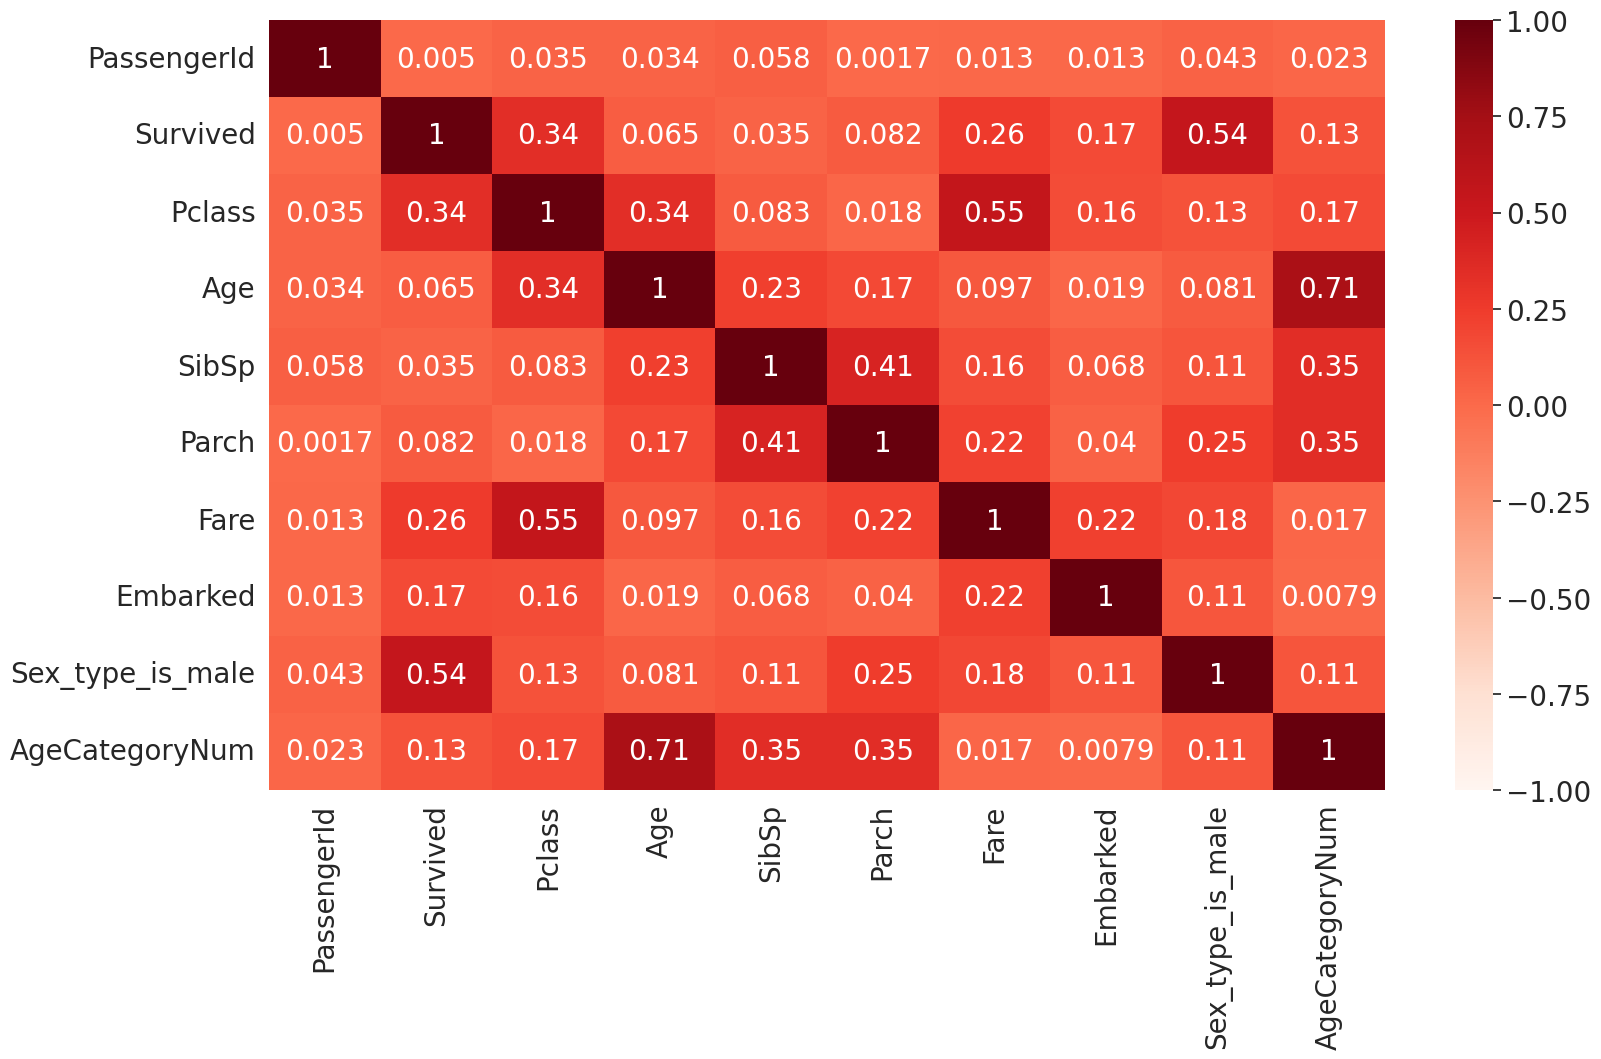

In [294]:
# showing heatmap of the copy train data with the new feature FarePerPclass
show_heatmap(train_cp)


We added the feature "AgeCategory" based on the hypothesis that distinct age groups could have affect on the survival rates. For example, seniors or children might exhibit higher chances of survival. We believed that categorizing age could provide a clearer understanding of the data compared to using age alone.

In our heatmap analysis, we found correlations among different features. Particularly noteworthy was the correlation coefficient of 0.71 between "Age" and "AgeCategory," which aligned with our expectations.


In [295]:
# divide the data to features and target
t = titanic_train['Survived'].copy()
X = titanic_train.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

# divide the data to features and target for titanic_cp
t_cp = train_cp['Survived'].copy()
X_cp = train_cp.drop(['Survived'], axis=1)


t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


PassengerId  Pclass   Age  SibSp  Parch     Fare  Embarked  \
0              1       3  22.0      1      0   7.2500         2   
1              2       1  38.0      1      0  71.2833         0   
2              3       3  26.0      0      0   7.9250         2   
3              4       1  35.0      1      0  53.1000         2   
4              5       3  35.0      0      0   8.0500         2   
..           ...     ...   ...    ...    ...      ...       ...   
886          887       2  27.0      0      0  13.0000         2   
887          888       1  19.0      0      0  30.0000         2   
888          889       3  28.0      1      2  23.4500         2   
889          890       1  26.0      0      0  30.0000         0   
890          891       3  32.0      0      0   7.7500         1   

     Sex_type_is_male  
0                   1  
1                   0  
2                   0  
3                   0  
4                   1  
..                ...  
886                 1  
887                 0  
888                 0  
889                 1  
890                 1  

[891 rows x 8 columns]

In [296]:
# split the data to train and validation
X_train, X_val, t_train, t_val =\
model_selection.train_test_split(X, t, test_size=0.3, random_state=42)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_val')
display(X_val)
print()
print('t_val')
display(t_val)

# split the data to train and validation for train_cp

X_train_cp, X_val_cp, t_train_cp, t_val_cp =\
model_selection.train_test_split(X_cp, t_cp, test_size=0.3, random_state=42)

X_train


PassengerId  Pclass   Age  SibSp  Parch      Fare  Embarked  \
445          446       1   4.0      0      2   81.8583         2   
650          651       3  28.0      0      0    7.8958         2   
172          173       3   1.0      1      1   11.1333         2   
450          451       2  36.0      1      2   27.7500         2   
314          315       2  43.0      1      1   26.2500         2   
..           ...     ...   ...    ...    ...       ...       ...   
106          107       3  21.0      0      0    7.6500         2   
270          271       1  28.0      0      0   31.0000         2   
860          861       3  41.0      2      0   14.1083         2   
435          436       1  14.0      1      2  120.0000         2   
102          103       1  21.0      0      1   77.2875         2   

     Sex_type_is_male  
445                 1  
650                 1  
172                 0  
450                 1  
314                 1  
..                ...  
106                 0  
270                 1  
860                 1  
435                 0  
102                 1  

[623 rows x 8 columns]


t_train


445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64


X_val


PassengerId  Pclass   Age  SibSp  Parch     Fare  Embarked  \
709          710       3  28.0      1      1  15.2458         0   
439          440       2  31.0      0      0  10.5000         2   
840          841       3  20.0      0      0   7.9250         2   
720          721       2   6.0      0      1  33.0000         2   
39            40       3  14.0      1      0  11.2417         0   
..           ...     ...   ...    ...    ...      ...       ...   
821          822       3  27.0      0      0   8.6625         2   
633          634       1  28.0      0      0   0.0000         2   
456          457       1  65.0      0      0  26.5500         2   
500          501       3  17.0      0      0   8.6625         2   
430          431       1  28.0      0      0  26.5500         2   

     Sex_type_is_male  
709                 1  
439                 1  
840                 1  
720                 0  
39                  0  
..                ...  
821                 1  
633                 1  
456                 1  
500                 1  
430                 1  

[268 rows x 8 columns]


t_val


709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64

In [297]:
# create the SGDClassifier and predict the probabilities of the train and test data

def get_sgd_accuracy(alpha,learning_rate,eta0):
  SGD_cls = pipeline.make_pipeline(
      preprocessing.StandardScaler(),
      linear_model.SGDClassifier(loss='log_loss', alpha=alpha,
                                  learning_rate=learning_rate,
                                  eta0=eta0)
      ).fit(X_train, t_train)

  return SGD_cls.score(X_train, t_train), SGD_cls.score(X_val, t_val)

def get_sgd_loss(alpha,learning_rate,eta0):
  SGD_cls = pipeline.make_pipeline(
      preprocessing.StandardScaler(),
      linear_model.SGDClassifier(loss='log_loss', alpha=alpha,
                                  learning_rate=learning_rate,
                                  eta0=eta0)
      ).fit(X_train, t_train)

  y_train_prob = SGD_cls.predict_proba(X_train)
  y_val_prob = SGD_cls.predict_proba(X_val)

  return metrics.log_loss(t_train, y_train_prob), metrics.log_loss(t_val, y_val_prob)



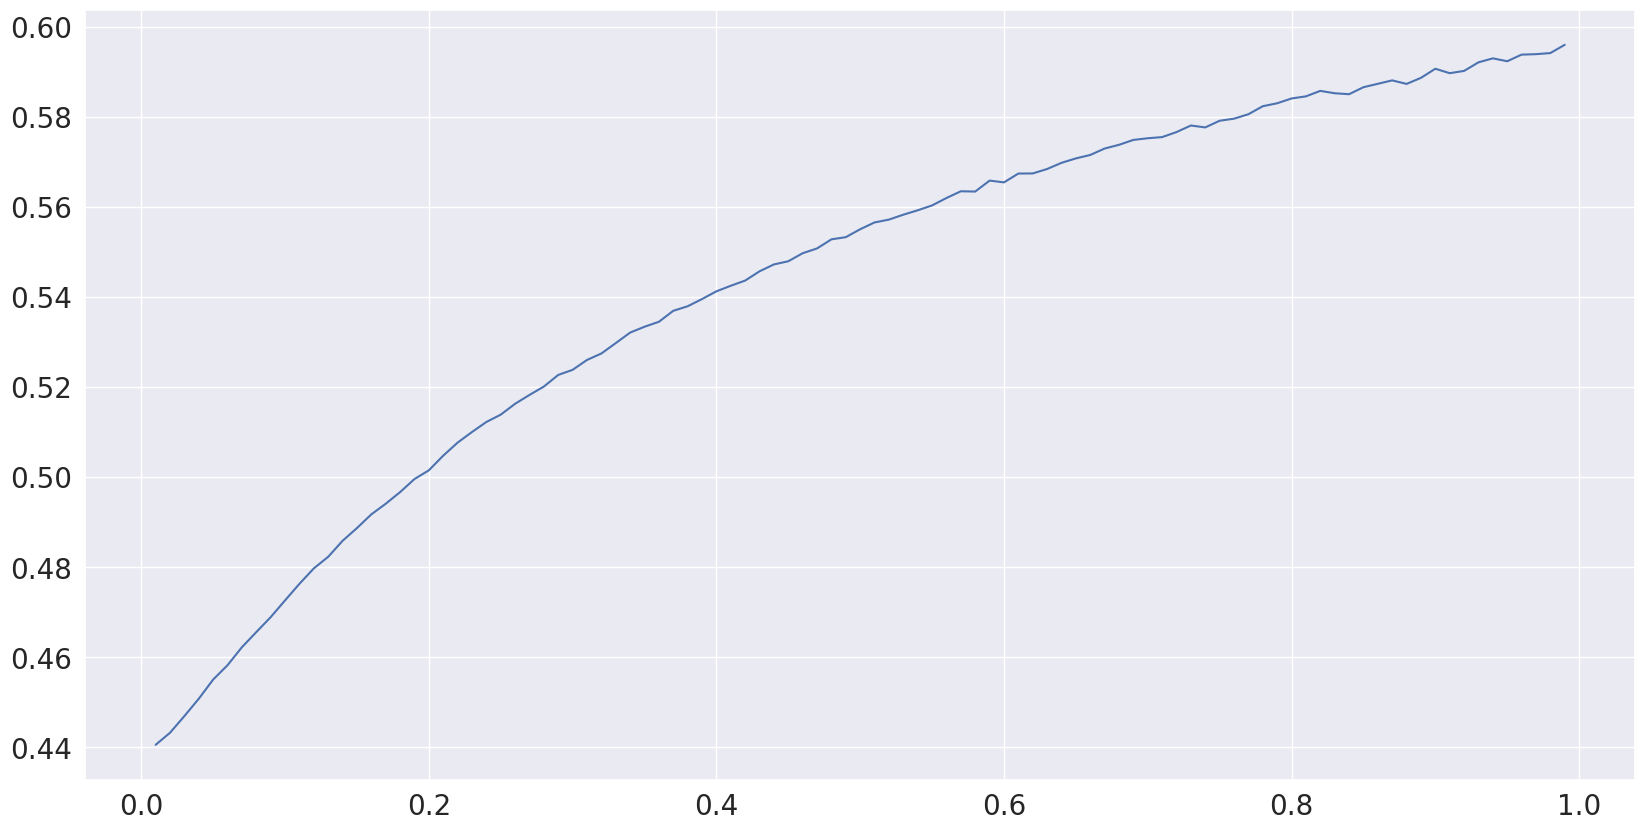

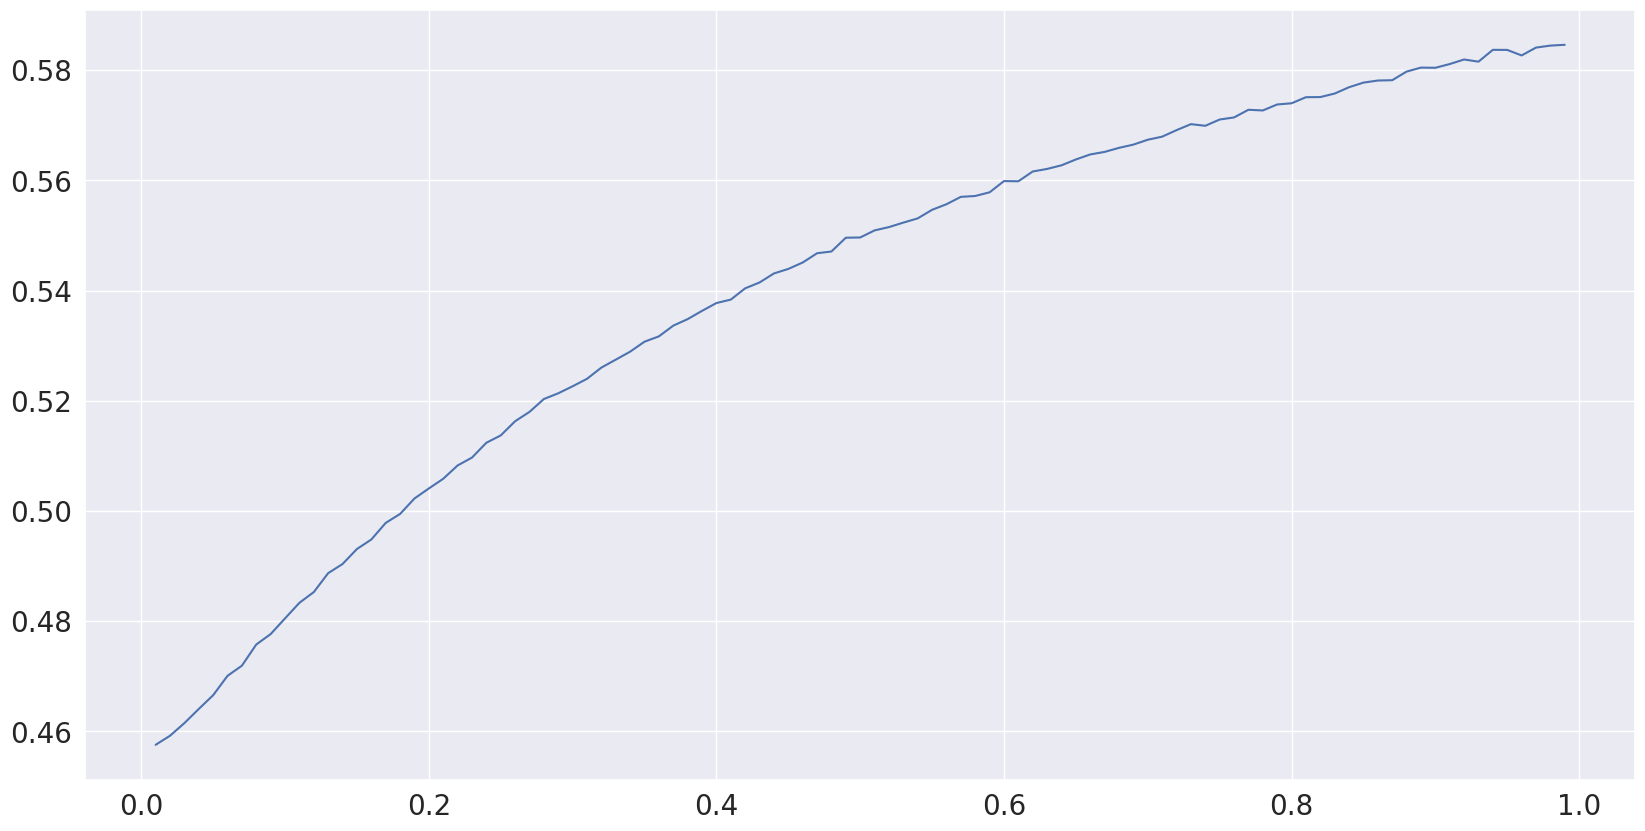

In [298]:
#show graps of training  training loss and of the validation loss as a function of alpha

validation_loss=[]
for i in np.arange(0.01,1,0.01):
  validation_loss.append(get_sgd_loss(i,'constant',0.001)[1])
plt.plot(np.arange(0.01,1,0.01),validation_loss)
plt.show()

train_loss=[]
for i in np.arange(0.01,1,0.01):
  train_loss.append(get_sgd_loss(i,'constant',0.001)[0])
plt.plot(np.arange(0.01,1,0.01),train_loss)
plt.show()

[0.8022388059701493, 0.8022388059701493, 0.8022388059701493, 0.7985074626865671, 0.7985074626865671, 0.7985074626865671, 0.7985074626865671, 0.7985074626865671, 0.8022388059701493, 0.8059701492537313, 0.8022388059701493, 0.7985074626865671, 0.8022388059701493, 0.8059701492537313, 0.8022388059701493, 0.8022388059701493, 0.8022388059701493, 0.8022388059701493, 0.7985074626865671, 0.7985074626865671, 0.7985074626865671, 0.7947761194029851, 0.7947761194029851, 0.8022388059701493, 0.7947761194029851, 0.7873134328358209, 0.7873134328358209, 0.7873134328358209, 0.7835820895522388, 0.7798507462686567, 0.7761194029850746, 0.7723880597014925, 0.7611940298507462, 0.7686567164179104, 0.7611940298507462, 0.7686567164179104, 0.7574626865671642, 0.7574626865671642, 0.753731343283582, 0.7425373134328358, 0.75, 0.7425373134328358, 0.7388059701492538, 0.7388059701492538, 0.7425373134328358, 0.7388059701492538, 0.7388059701492538, 0.7313432835820896, 0.7425373134328358, 0.7425373134328358, 0.727611940298

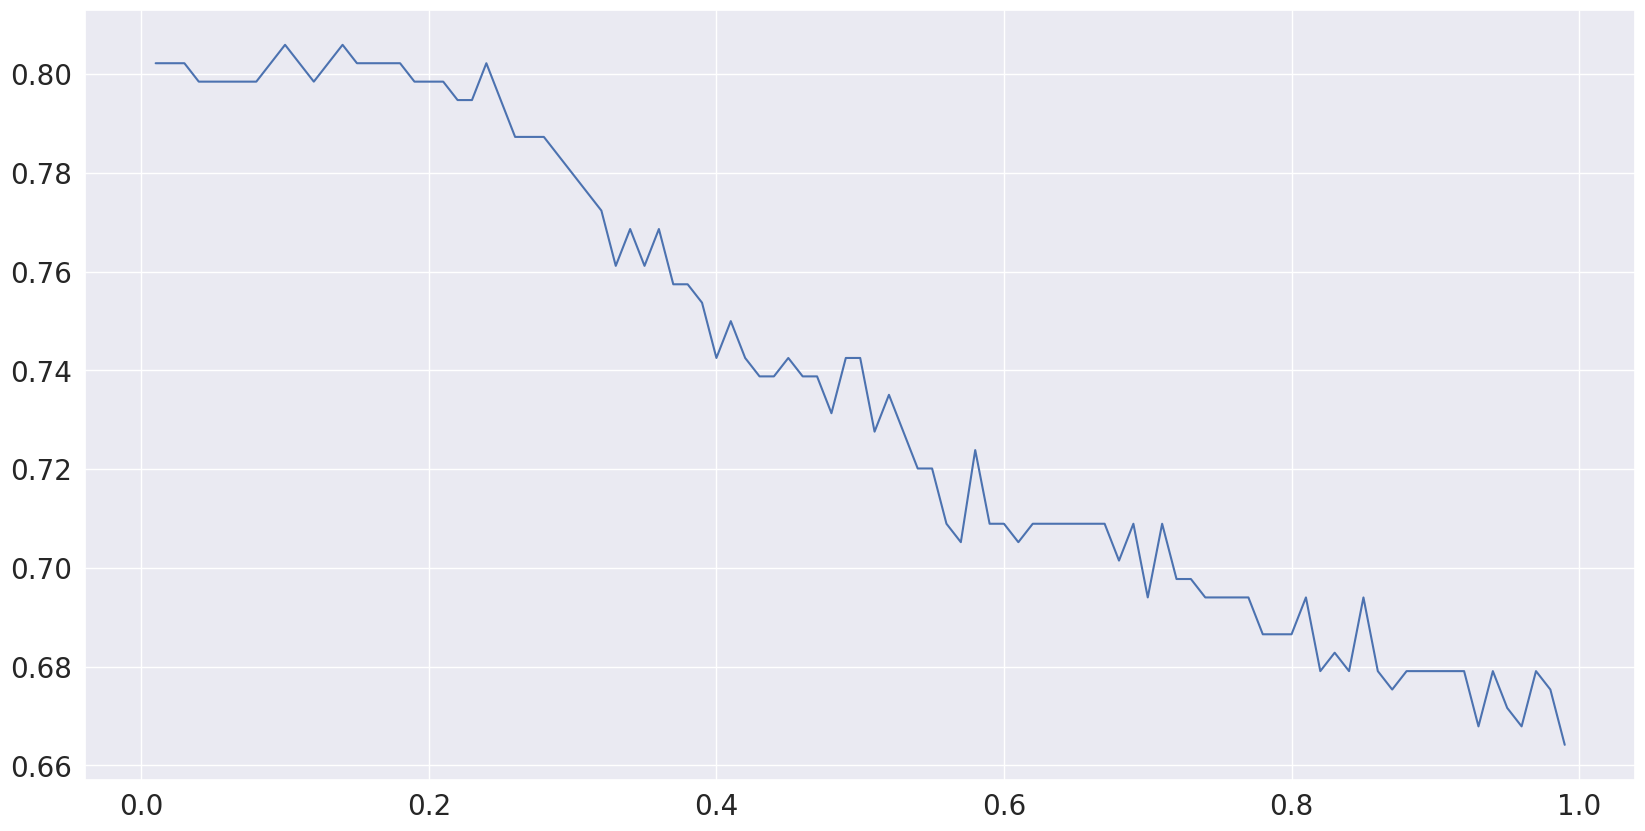

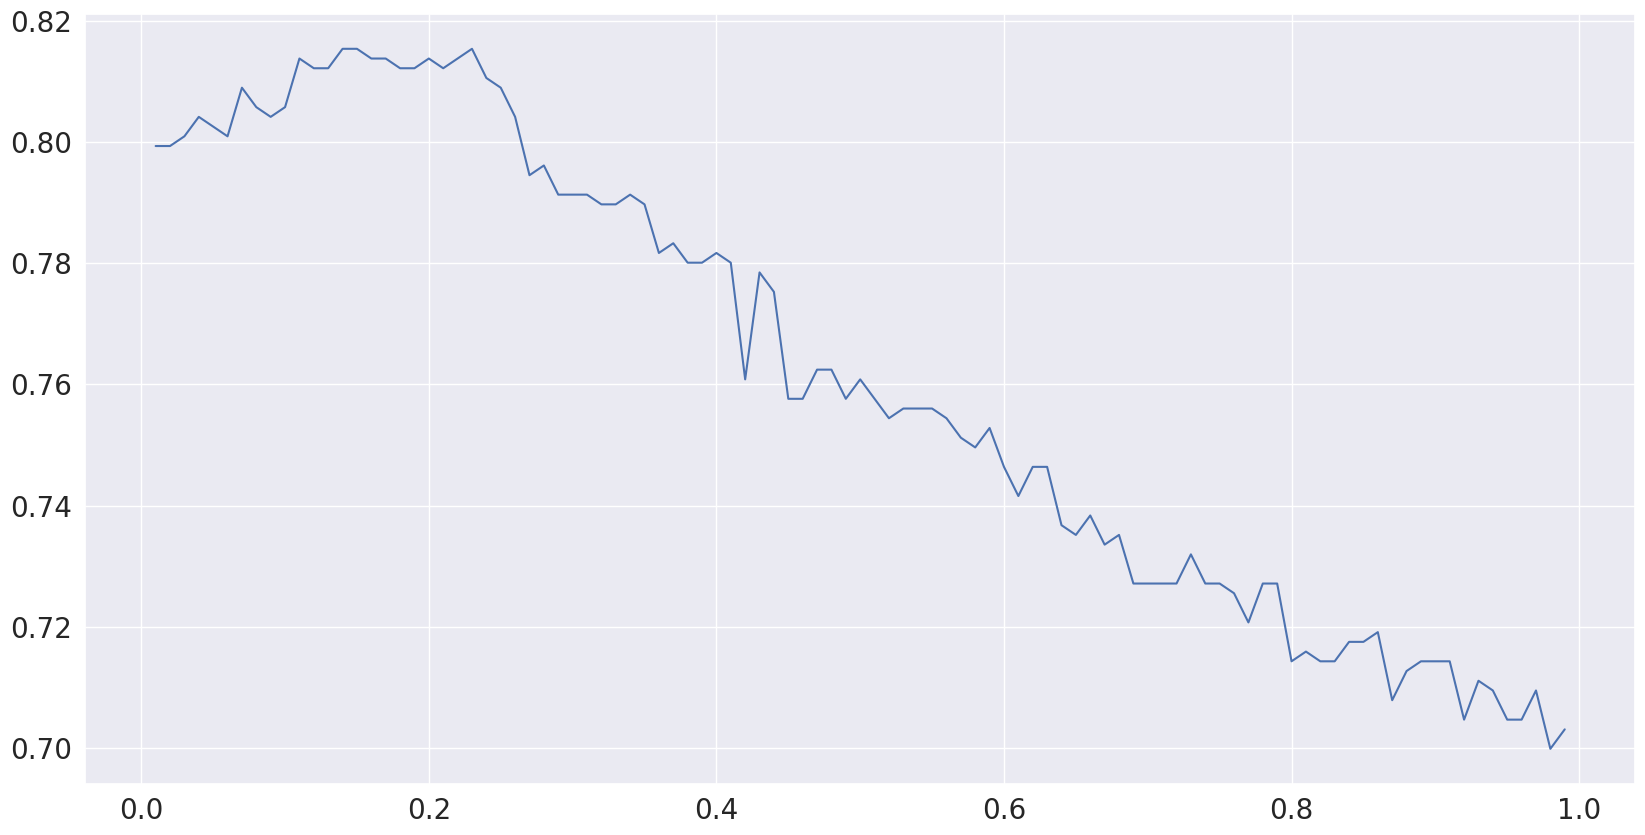

0.09999999999999999


In [299]:
#show graps of training accuracy and of the validation accuracy as a function of alpha

validation_accuracy=[]
for i in np.arange(0.01,1,0.01):
  validation_accuracy.append(get_sgd_accuracy(i,'constant',0.001)[1])
print(validation_accuracy)

plt.plot(np.arange(0.01,1,0.01),validation_accuracy)
plt.show()

train_accuracy=[]
for i in np.arange(0.01,1,0.01):
  train_accuracy.append(get_sgd_accuracy(i,'constant',0.001)[0])
plt.plot(np.arange(0.01,1,0.01),train_accuracy)
plt.show()

#finding the alpha value that gives the max validation accuracy

max_i = np.argmax(validation_accuracy)
alpha_max = np.arange(0.01,1,0.01)[max_i]
print(alpha_max)

In [300]:
# predict the test with SGDClassifier

SGD_cls_max_alpha=pipeline.make_pipeline(
      preprocessing.StandardScaler(),
      linear_model.SGDClassifier(loss='log_loss', alpha=alpha_max,
                                  learning_rate='constant',
                                  eta0=0.001)
      ).fit(X, t)


print(SGD_cls_max_alpha.score(X, t))

# predict the test with SGDClassifier on train set with added feture "catagorize age"

SGD_cls_max_alpha_cp=pipeline.make_pipeline(
      preprocessing.StandardScaler(),
      linear_model.SGDClassifier(loss='log_loss', alpha=alpha_max,
                                  learning_rate='constant',
                                  eta0=0.001)
      ).fit(X_cp, t_cp)

print(SGD_cls_max_alpha_cp.score(X_cp, t_cp))

0.8047138047138047
0.8080808080808081


first we showed the loss and accuracy of the model on the trainig and validion set as a function of alpha.
we can see that the value of alpha that maximizes the accuracy and  minimize the loss is between 0 to 1.

also the added feature "categorized age" dosent change the score of the modle.

We decided to use the model with the additional feature and with "alpha_max", where "alpha_max" is the value of alpha that gives the highest accuracy on the validation set.

In [301]:
# Prepare the predictions
X_test_cp = test_cp.copy()
test_cp['Survived'] = SGD_cls_max_alpha_cp.predict(X_test_cp)

# Prepare submission file
submission2 = test_cp[['PassengerId', 'Survived']]
submission2.to_csv('submission2.csv', index=False)
print('Submission file created successfully!')



Submission file created successfully!


In [302]:
test_cp

PassengerId  Pclass   Age  SibSp  Parch      Fare  Embarked  \
0            892       3  34.5      0      0    7.8292         1   
1            893       3  47.0      1      0    7.0000         2   
2            894       2  62.0      0      0    9.6875         1   
3            895       3  27.0      0      0    8.6625         2   
4            896       3  22.0      1      1   12.2875         2   
..           ...     ...   ...    ...    ...       ...       ...   
413         1305       3  27.0      0      0    8.0500         2   
414         1306       1  39.0      0      0  108.9000         0   
415         1307       3  38.5      0      0    7.2500         2   
416         1308       3  27.0      0      0    8.0500         2   
417         1309       3  27.0      1      1   22.3583         0   

     Sex_type_is_male  AgeCategoryNum  Survived  
0                   1             3.0         0  
1                   0             3.0         0  
2                   1             4.0         0  
3                   1             3.0         0  
4                   0             3.0         0  
..                ...             ...       ...  
413                 1             3.0         0  
414                 0             3.0         1  
415                 1             3.0         0  
416                 1             3.0         0  
417                 1             3.0         0  

[418 rows x 10 columns]

#submissions

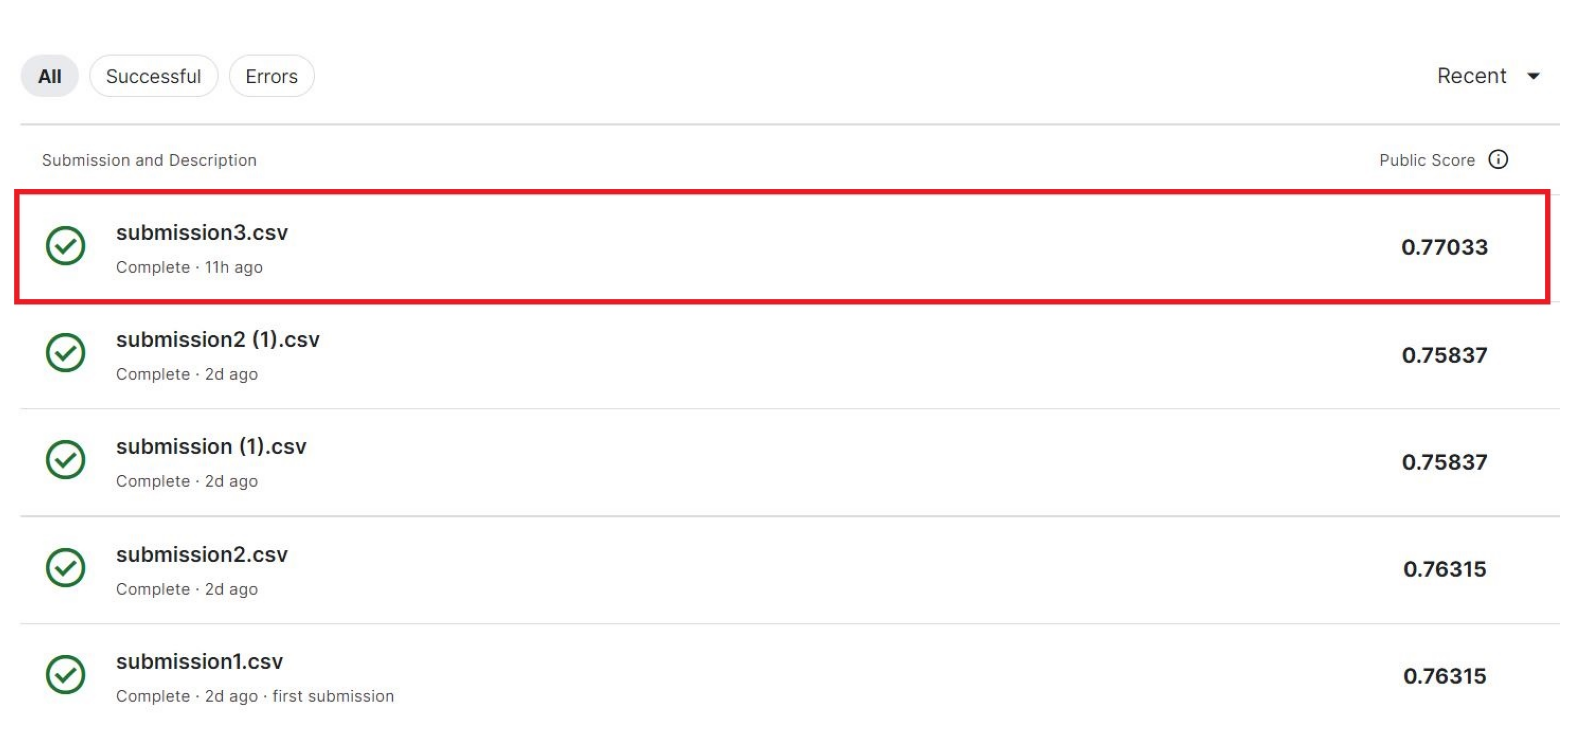

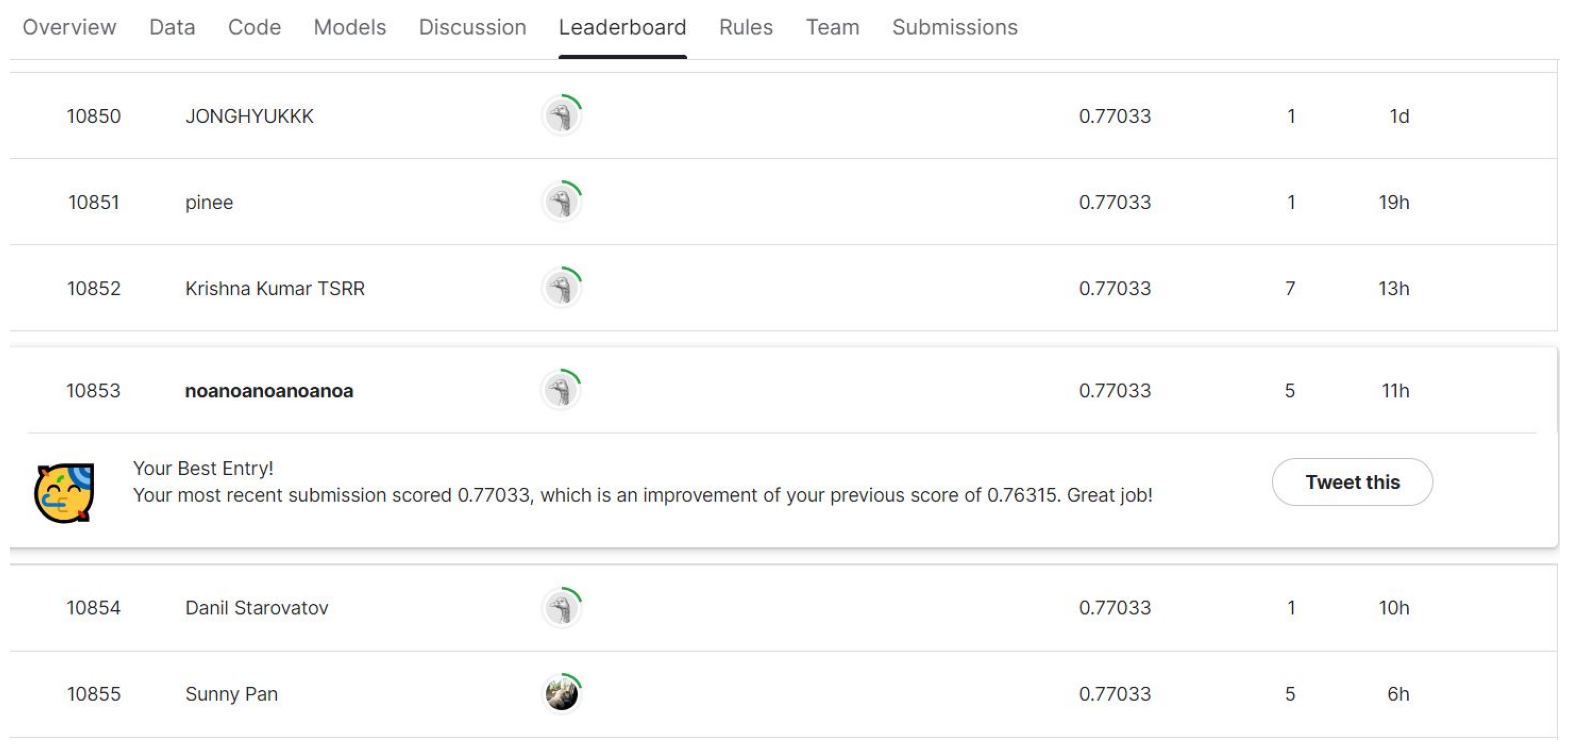

In [303]:
import matplotlib.image as mpimg

img = mpimg.imread('/submissions.JPG') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('/leaderboard.JPG') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

#conclusion

In [304]:
!jupyter nbconvert --execute --to html "/content/Titanic_Project.ipynb"

[NbConvertApp] WARNING | pattern '/content/Titanic_Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]


In the "Titanic - Machine Learning from Disaster" project, we began by exploring the dataset to identify necessary adjustments for the success of our model. Initially, we removed columns that lacked relevant information for classification. We employed various methods to handle missing data, such as random imputation or median imputation. Additionally, we attempted to enhance our model by introducing an additional feature, which ultimately did not contribute to improving our model's performance.

Throughout our analysis, we utilized graphs to visualize the model's scores and losses as functions of alpha. Our final submission achieved a score of 0.77033 on Kaggle.

# Part 3

#TL;DR for Exercise 3

In this project, we will continue our work on the Titanic dataset with the goal of predicting passenger survival based on the provided data. We will introduce new algorithms such as KNN and perform hyperparameter searches to find the optimal parameters, aiming to enhance our model's performance in this classification task.

#Experiments

In [305]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


In [306]:
# print lasso, ridge and elasticnet scores as regression
from sklearn.model_selection import cross_val_score



sgd_lasso_reg = SGDRegressor(penalty='l1',
                             random_state=1)
sgd_ridge_reg = SGDRegressor(penalty='l2',
                             random_state=1)
sgd_elastic_reg = SGDRegressor(penalty='elasticnet',
                               random_state=1)

print("R2 score for regression:")
print('sgd_lasso',
      cross_val_score(
          make_pipeline(
              StandardScaler(),
              sgd_lasso_reg),
              X_cp, t_cp, cv=15).mean())

print('sgd_ridge',
      cross_val_score(
          make_pipeline(
              StandardScaler(),
              sgd_ridge_reg),
              X_cp, t_cp, cv=15).mean())

print('sgd_elastic',
      cross_val_score(
          make_pipeline(
              StandardScaler(),
              sgd_elastic_reg),
              X_cp, t_cp, cv=15).mean())


R2 score for regression:
sgd_lasso 0.37785903286622236
sgd_ridge 0.37775463259643277
sgd_elastic 0.37777018440801685


In [307]:
# create accuracy score for ordinal predictions
from sklearn.metrics import make_scorer, accuracy_score

def get_accurate_ordinal_preds_from_numeric_preds(
    preds, min=None, max=None):
    if min is None:
        min = round(min(preds))
    if max is None:
        max = round(max(preds))
    preds = np.asarray(preds).ravel()
    return np.array(
        [round(p) if min <= p and p <= max else min if
         p < min else max for p in preds])

def accuracy_for_ordinal(y, y_pred):
    min_ord = min(y)
    max_ord = max(y)
    y_pred_ord = get_accurate_ordinal_preds_from_numeric_preds(y_pred, min=min_ord, max=max_ord)
    return accuracy_score(y, y_pred_ord)

print("Accuracy score for regression:")

print('sgd_lasso',
      cross_val_score(make_pipeline(StandardScaler(), sgd_lasso_reg),
                      X_cp, t_cp, cv=15,
                      scoring=make_scorer(accuracy_for_ordinal)).mean())

print('sgd_ridge',
      cross_val_score(make_pipeline(StandardScaler(), sgd_ridge_reg),
                      X_cp, t_cp, cv=15,
                      scoring=make_scorer(accuracy_for_ordinal)).mean())

print('sgd_elastic',
      cross_val_score(make_pipeline(StandardScaler(), sgd_elastic_reg),
                      X_cp, t_cp, cv=15,
                      scoring=make_scorer(accuracy_for_ordinal)).mean())


Accuracy score for regression:
sgd_lasso 0.7945951035781544
sgd_ridge 0.7957062146892656
sgd_elastic 0.7957062146892656


In [308]:
# print lasso, ridge and elasticnet scores as classification
sgd_lasso_cls =SGDClassifier(penalty='l1', random_state=1)
sgd_ridge_cls = SGDClassifier(penalty='l2', random_state=1)
sgd_elastic_cls = SGDClassifier(penalty='elasticnet', random_state=1)

print("Accuracy score for classification:")
print('sgd_lasso', cross_val_score(make_pipeline(StandardScaler(), sgd_lasso_cls), X_cp, t_cp, cv=15).mean())
print('sgd_ridge', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge_cls), X_cp, t_cp, cv=15).mean())
print('sgd_elastic', cross_val_score(make_pipeline(StandardScaler(), sgd_elastic_cls), X_cp, t_cp, cv=15).mean())


Accuracy score for classification:
sgd_lasso 0.7744632768361582
sgd_ridge 0.7452542372881357
sgd_elastic 0.7587570621468926


In [309]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

X_normalized = StandardScaler().fit_transform(X_cp)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'),
                    'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(
    SGDClassifier(random_state=1),
     hyper_parameters).fit(X_normalized, t_cp)

print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)



Accuracy score for classification:
gs_model 0.7946079969870065
best params {'alpha': 0.001, 'penalty': 'elasticnet'}


In [310]:
# train with random search and get best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1),
                     penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(),
                              distributions,
                              random_state=1)\
                              .fit(X_normalized, t_cp)

print('Accuracy score for classification:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)


Accuracy score for classification:
rs_model 0.7979599522942691
best params {'alpha': 0.534413908947017, 'penalty': 'l2'}


The best parameters on this model (obtained with Random Search) were penalty=l2 and alpha=0.0.534413908947017.
The Accuracy score of the Randomized Search is a little less than the score of the Grid Search, but it may change with a different random seed.

The Accuracy score of the Grid Search is a little less than the score of the Randomized Search, and The best parameters on this model (obtained with Random Search) were penalty=l2 and alpha=0.534413908947017






In [311]:
# clone the lwlr repo from github
!git clone https://github.com/qiaochen/CourseExercises


fatal: destination path 'CourseExercises' already exists and is not an empty directory.


In [312]:
# run KNN on the dataset and find best K by accuracy
from sklearn.neighbors import KNeighborsClassifier
arr_X_normalized = np.asarray(X_normalized)

hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters).fit(arr_X_normalized, t_cp)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)


Accuracy score for classification:
gs_neigh_model 0.8215303496327913
best params {'n_neighbors': 12}


We can see that the best n_neighbors is 12.




In [313]:
# run KNN on the dataset and find best K by R2 and accuracy
from sklearn.neighbors import KNeighborsRegressor
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(
    n_neighbors=5, weights='distance'),
    hyper_parameters).fit(arr_X_normalized, t_cp)

print('R2 score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)
print()

gs_neigh_model = GridSearchCV(KNeighborsRegressor(
    n_neighbors=5, weights='distance'),
    hyper_parameters, scoring=make_scorer(accuracy_for_ordinal)).\
    fit(arr_X_normalized, t_cp)

print('Accuracy score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)


R2 score for regression:
gs_neigh_model 0.4169295140307966
best params {'n_neighbors': 15}

Accuracy score for regression:
gs_neigh_model 0.8080597577051034
best params {'n_neighbors': 11}


In [314]:
# different sub groups of features
# use column transformer to insert different transformers for each column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import numpy as np
import pandas as pd

# Convert numpy arrays to pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
X_test_cp = pd.DataFrame(X_test_cp)

# determine categorical and numerical features
numerical_cols = X_normalized.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_normalized.select_dtypes(include=['object', 'bool']).columns
all_cols = X_normalized.columns

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

ct = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)])

ct.fit(X_normalized)

X_encoded = pd.DataFrame(ct.transform(X_normalized), columns=all_cols)
test_encoded = pd.DataFrame(ct.transform(X_test_cp), columns=all_cols)


Numerical Cols: Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Categorical Cols: RangeIndex(start=0, stop=0, step=1)
All Cols: RangeIndex(start=0, stop=9, step=1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but MinMaxScaler was fitted without feature names



In [315]:
# find best subset of features on this dataset with SGDRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

selector_sgd_RFECV = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t_cp)
X_selected_features_sgd = X_encoded.loc[:, selector_sgd_RFECV.support_]
display(X_selected_features_sgd)

# print the score of the selected features
cv_results = selector_sgd_RFECV.cv_results_
mean_test_scores = cv_results['mean_test_score']
max_sgd_RFECV = np.max(mean_test_scores)
print(max_sgd_RFECV)


1    7
0    1.0  1.0
1    0.0  0.0
2    1.0  0.0
3    0.0  0.0
4    1.0  1.0
..   ...  ...
886  0.5  1.0
887  0.0  0.0
888  1.0  0.0
889  0.0  1.0
890  1.0  1.0

[891 rows x 2 columns]

0.3227397565050903


In [316]:
#forword
from sklearn.feature_selection import SequentialFeatureSelector

sgd_regressor = SGDRegressor(random_state=1)

selector_sgd_SFS = SequentialFeatureSelector(SGDRegressor(random_state=1), n_features_to_select='auto', direction='forward', cv=5).fit(X_encoded, t_cp)
X_selected_features_sgd_SFS = X_encoded.loc[:, selector_sgd_SFS.support_]
display(X_selected_features_sgd_SFS)
cv_scores_SFS = cross_val_score(sgd_regressor, X_selected_features_sgd_SFS, t, cv=5)
max_sgd_SFS = np.max(cv_scores_SFS)
print(max_sgd_SFS)


1      3         5    7
0    1.0  0.125  0.014151  1.0
1    0.0  0.125  0.139136  0.0
2    1.0  0.000  0.015469  0.0
3    0.0  0.125  0.103644  0.0
4    1.0  0.000  0.015713  1.0
..   ...    ...       ...  ...
886  0.5  0.000  0.025374  1.0
887  0.0  0.000  0.058556  0.0
888  1.0  0.125  0.045771  0.0
889  0.0  0.000  0.058556  1.0
890  1.0  0.000  0.015127  1.0

[891 rows x 4 columns]

0.3813432426254568


#results analysis

In [317]:
# calculate cm for train and val
from sklearn.metrics import confusion_matrix

model_pipe = make_pipeline(SGDClassifier(random_state=1)).fit(X_train, t_train)
y_train = model_pipe.predict(X_train)
y_val = model_pipe.predict(X_val)
cm_train = confusion_matrix(t_train, y_train)

cm_val = confusion_matrix(t_val, y_val)

print('cm_train')
print(cm_train)
print()
print('cm_val')
print(cm_val)


cm_train
[[  5 387]
 [  6 225]]

cm_val
[[  3 154]
 [  1 110]]


The high number of false positives (387) compared to the true positives (5) indicates that the model is significantly over-predicting the positive class on the training data.

In [318]:
cm_train_normalized = confusion_matrix(t_train, y_train, normalize='true')
cm_val_normalized = confusion_matrix(t_val, y_val, normalize='true')

cm_train_normalized_manually = cm_train / cm_train.sum(1)
cm_val_normalized_manually = cm_val / cm_val.sum(1)

print('cm_train_normalized_manually:\n', cm_train_normalized_manually)
print()
print('cm_val_normalized_manually:\n', cm_val_normalized_manually)
print()

print('cm_train_normalized:\n', cm_train_normalized)
print()
print('cm_val_normalized:\n', cm_val_normalized)


cm_train_normalized_manually:
 [[0.0127551  1.67532468]
 [0.01530612 0.97402597]]

cm_val_normalized_manually:
 [[0.01910828 1.38738739]
 [0.00636943 0.99099099]]

cm_train_normalized:
 [[0.0127551  0.9872449 ]
 [0.02597403 0.97402597]]

cm_val_normalized:
 [[0.01910828 0.98089172]
 [0.00900901 0.99099099]]


In [319]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

print(f'Train: precision {precision(cm_train):.2f}, recall {recall(cm_train):.2f}, specificity {specificity(cm_train):.2f}, fpr {fpr(cm_train):.2f}, accuracy {accuracy(cm_train):.2f}')
print(f'Val:   precision {precision(cm_val):.2f}, recall {recall(cm_val):.2f}, specificity {specificity(cm_val):.2f}, fpr {fpr(cm_val):.2f}, accuracy {accuracy(cm_val):.2f}')


Train: precision 0.37, recall 0.97, specificity 0.01, fpr 0.99, accuracy 0.37
Val:   precision 0.42, recall 0.99, specificity 0.02, fpr 0.98, accuracy 0.42


SGDRegressor with RFECV


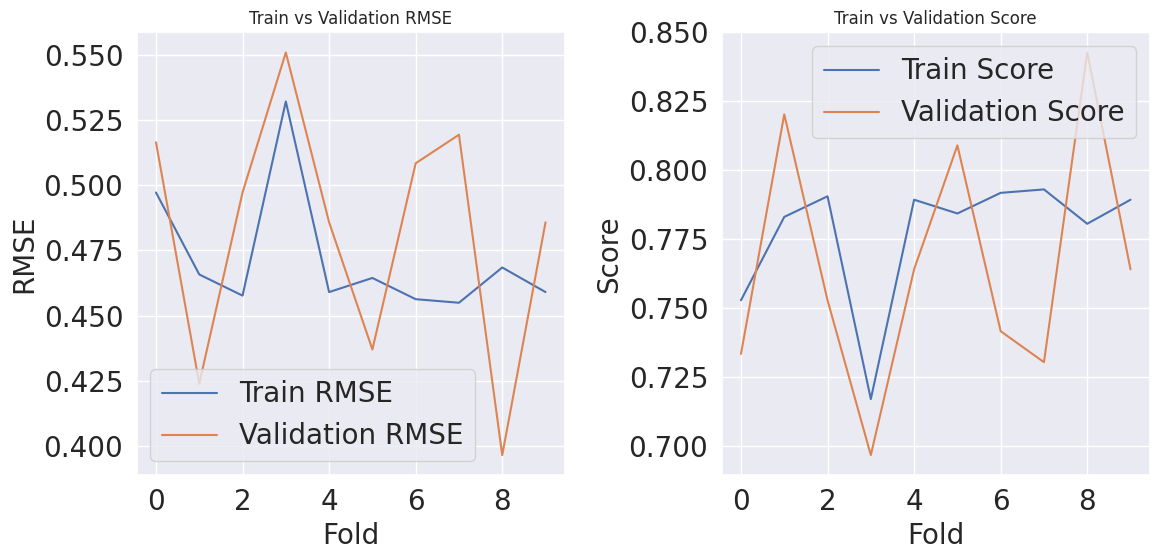

mean cv val score: 0.77
mean cv val RMSE: 0.48
mean cv train score: 0.78
mean cv train RMSE: 0.47
SGDRegressor with SFS


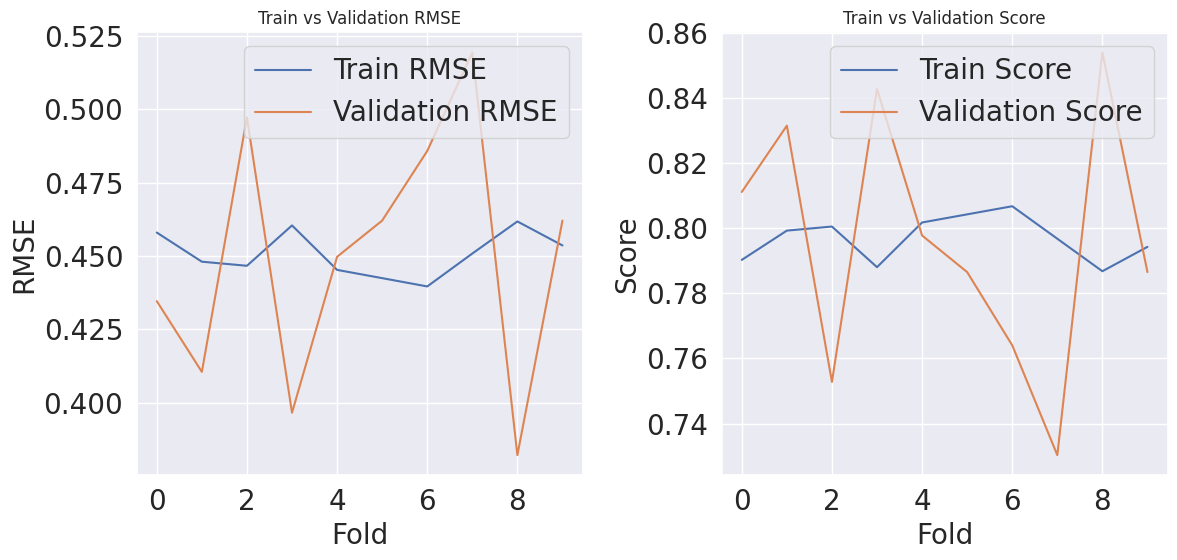

mean cv val score: 0.80
mean cv val RMSE: 0.45
mean cv train score: 0.80
mean cv train RMSE: 0.45


In [320]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def get_cv_score_and_loss(X, t, model, k=10, show_score_loss_graphs=True):
    kf = KFold(n_splits=k)
    val_scores = []
    train_scores = []
    val_losses = []
    train_losses = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        t_train, t_val = t[train_index], t[val_index]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)

        train_loss = mean_squared_error(t_train, y_train)
        val_loss = mean_squared_error(t_val, y_val)

        train_scores.append(model.score(X_train, t_train))
        val_scores.append(model.score(X_val, t_val))
        train_losses.append(np.sqrt(train_loss))
        val_losses.append(np.sqrt(val_loss))

    if show_score_loss_graphs:
        # Plotting RMSE
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train RMSE')
        plt.plot(val_losses, label='Validation RMSE')
        plt.xlabel('Fold')
        plt.ylabel('RMSE')
        plt.title('Train vs Validation RMSE')
        plt.legend()

        # Plotting Scores
        plt.subplot(1, 2, 2)
        plt.plot(train_scores, label='Train Score')
        plt.plot(val_scores, label='Validation Score')
        plt.xlabel('Fold')
        plt.ylabel('Score')
        plt.title('Train vs Validation Score')
        plt.legend()

        plt.tight_layout()
        plt.show()

    mean_train_loss = np.mean(train_losses)
    mean_val_loss = np.mean(val_losses)
    mean_train_score = np.mean(train_scores)
    mean_val_score = np.mean(val_scores)

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

def evaluate_model(X, t, model):
    val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model, k=10, show_score_loss_graphs=True)
    print(f'mean cv val score: {val_score:.2f}\nmean cv val RMSE: {val_loss:.2f}')
    print(f'mean cv train score: {train_score:.2f}\nmean cv train RMSE: {train_loss:.2f}')

# יצירת מודלים של SGDRegressor
model_sgd = SGDClassifier()

# הנחה ש- X_selected_features_sgd ו- X_selected_features_sgd_SFS הם מערכי NumPy
print('SGDClassifier with RFECV')
evaluate_model(np.array(X_selected_features_sgd), np.array(t), model_sgd)

print('SGDClassifier with SFS')
evaluate_model(np.array(X_selected_features_sgd_SFS), np.array(t), model_sgd)



we can see that SGDClassifier with SFS has a better score.

#submission

In [321]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load the datasets
train_df = pd.read_csv('/train.csv')
test_df = pd.read_csv('/test.csv')

# Data preprocessing
def preprocess_data(df):
    # Encode categorical variables
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
    df['Embarked'].fillna('S', inplace=True)
    df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

    # Fill missing Age values with median
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Fill missing Fare values with median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Drop columns that won't be used
    df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

    return df

# Preprocess train and test data
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Separate features and target variable from training data
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Define best hyperparameters
best_params = {'alpha': 0.534413908947017, 'max_iter': 2000, 'penalty': 'l2'}

# Define the SGDClassifier with best hyperparameters and balanced class weights
best_sgd = SGDClassifier(alpha=best_params['alpha'], max_iter=best_params['max_iter'], penalty=best_params['penalty'], random_state=1, class_weight='balanced')

# Define the cross-validation strategy
cv_strategy = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Create a pipeline with scaling and classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', best_sgd)
])

# Create and fit the SequentialFeatureSelector model
sfs_model = SequentialFeatureSelector(estimator=pipeline, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=cv_strategy)
sfs_model.fit(X, y)

# Select features using SFS
X_selected_features_SFS = X.loc[:, sfs_model.get_support()]

# Train the final model on SFS-selected features
final_model_SFS = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(alpha=best_params['alpha'], max_iter=best_params['max_iter'], penalty=best_params['penalty'], random_state=1, class_weight='balanced'))
])
final_model_SFS.fit(X_selected_features_SFS, y)

# Select features from test data using the SFS model's support mask
X_test_selected_features_SFS = test_df.loc[:, sfs_model.get_support()]

# Make predictions on the test data
y_pred_SFS = final_model_SFS.predict(X_test_selected_features_SFS)  # Ensure predictions are binary

# Ensure predictions and true labels are of integer type
y_pred_SFS = y_pred_SFS.astype(int)




In [322]:
# Prepare the submission DataFrame
submission_new1 = pd.DataFrame({
    'PassengerId': titanic_test['PassengerId'],
    'Survived': y_pred_SFS
})

# Save the submission DataFrame to a CSV file
submission_new1.to_csv('submission_new1.csv', index=False)
print('Submission file created successfully!')



Submission file created successfully!


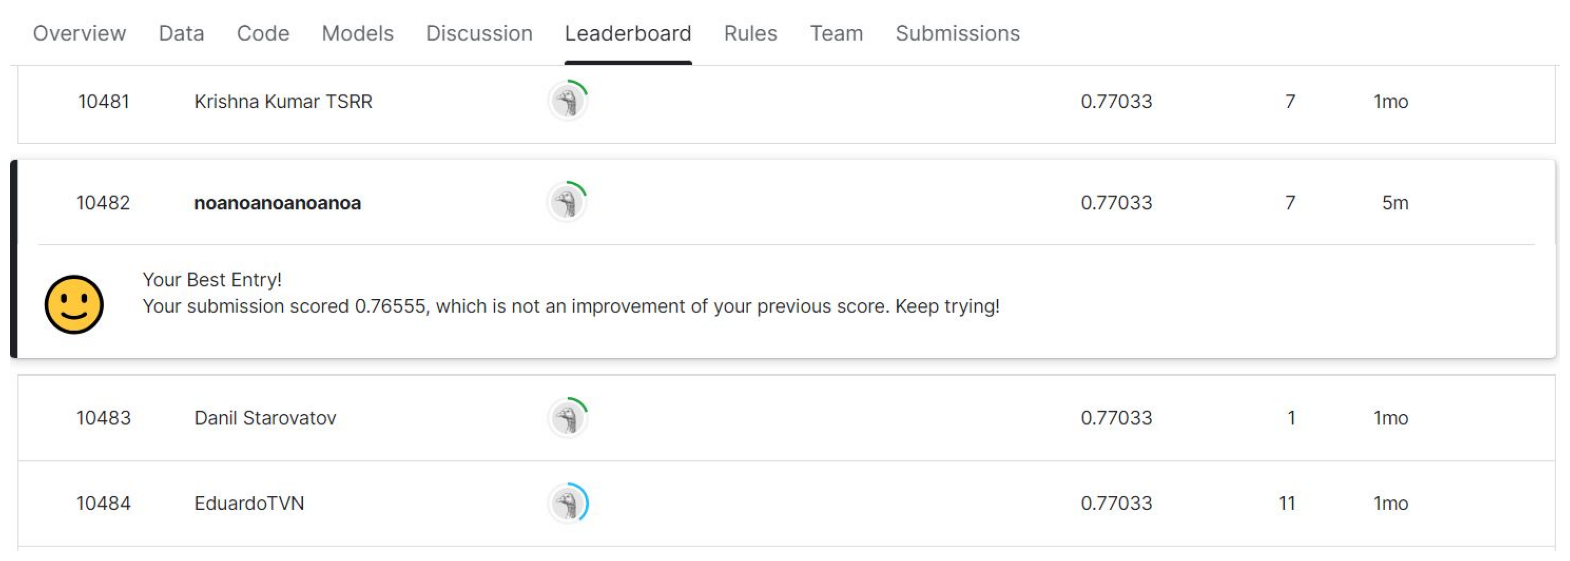

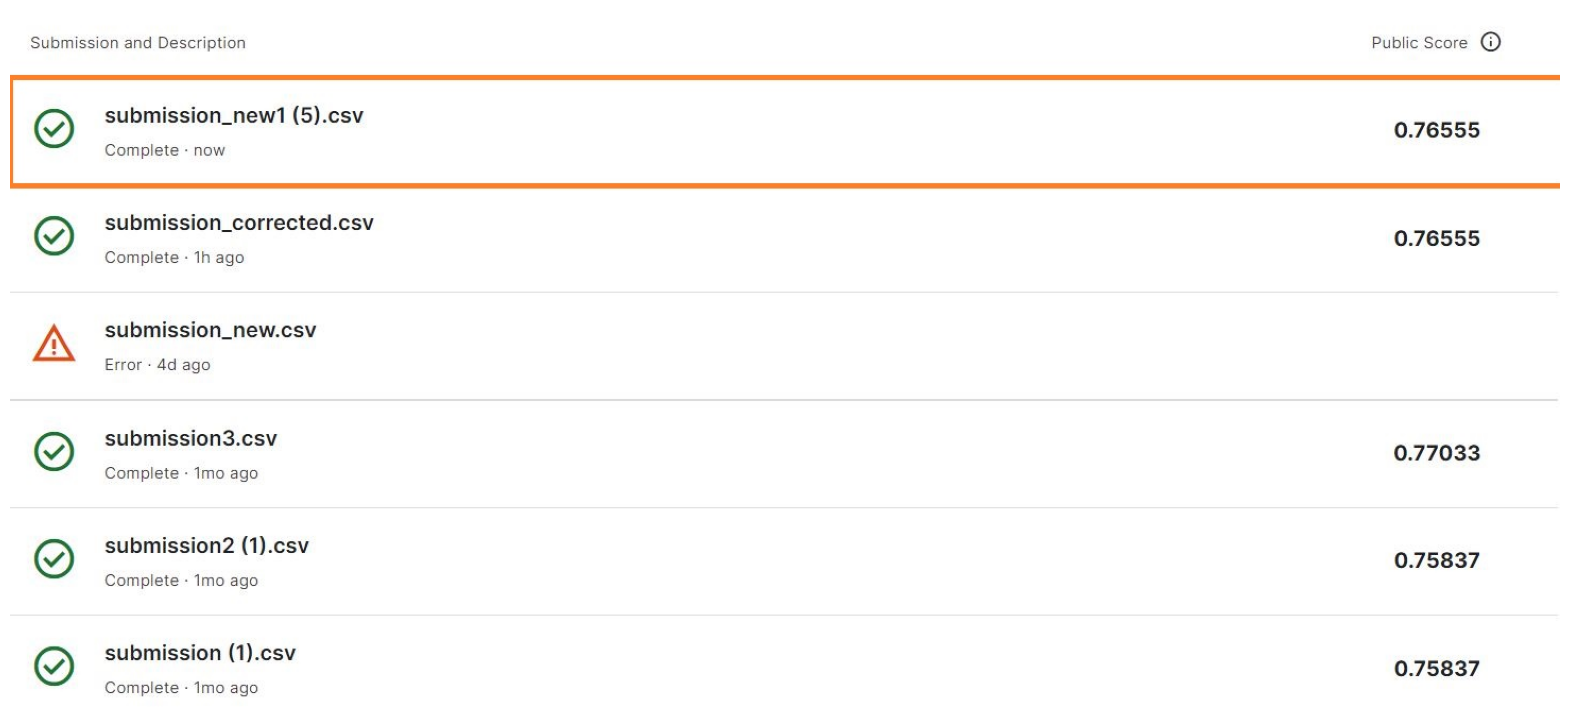

In [324]:
import matplotlib.image as mpimg

img = mpimg.imread('/leaderboard3.JPG')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('/submission3.JPG')
plt.imshow(img)
plt.axis('off')
plt.show()

#Summary

In this project, we continued our work on the Titanic dataset, utilizing the K-Nearest Neighbors (KNN) algorithm. We employed cross-validation with K-Folds, various feature selection algorithms, and both Grid Search and Random Search to identify the optimal hyperparameters. Data analysis was conducted using graphs and confusion matrices. Ultimately, we achieved an accuracy score of 0.7655.

In [ ]:
!jupyter nbconvert --execute --to html "/content/Titanic_Project.ipynb"